# RK90 Si probe data reshaping
This notebook is intended to be used for loading Si probe data, rearanging it and saving the flat binary file for later clustering with Klusta

- Continuous low pass data files have source 102 (1 per session)
- Continuous high pass data files have source 103 (32 per session)

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('/Volumes/kaylab-1/Code.Repository/Python/')

import OpenEphys

ddir = '/Volumes/kaylab-1/DataStores/Data/BO/Si probe/' # data directory
# choose data folder where files are stored
# dfold = 'RK90_2016-07-29_raw_30k_1min_S-Lim'
# dfold = 'RK90_2016-07-29_raw_30k_1min_Acetone'
# dfold = 'RK90_2016-07-29_raw_30k_1min_EMB'

ImportError: No module named 'OpenEphys'

In [7]:
# Load lowpass (LFP) signal
lfpname = '102_CH2.continuous'
filepath = ddir + dfold + '/' + lfpname
LFP = OpenEphys.loadContinuous(filepath, dtype=float)

# downsample LFP from 30kHz to 3kHz
# down = 10
# downsampled = scipy.signal.resample(lfpname,np.shape(lfpname)[0]/down)

# save as dat file
# folderpath = ddir + dfold
# datnameLFP = dfold + '_LFP.dat'
# LFP['data'].tofile(os.path.join(folderpath,datnameLFP))

Loading continuous data...


In [2]:
# Load highpass signals of each sahnk in geometric order (bottom of shank to top)
# then save to flat binary file
folderpath = ddir + dfold

# shnk1chan = [6, 8, 7, 9, 12, 14, 1, 2, 10, 16, 4, 13, 5, 15, 3, 11]
shnk1chan = [14, 1, 2, 10, 16, 4, 5, 15, 3, 11] # ch 6 7 8 9 12 13 are bad

# use the folder name to name individual dat files
datname1 = dfold + '_shank1.dat'
OpenEphys.pack_2(folderpath, filename = datname1, source = '103',channels = shnk1chan, dref=None)

Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Avg. Load Time: 1.4106745918591816 sec
Total Load Time: 16.928548097610474 sec
Packing data to file: RK90_2016-07-29_raw_30k_1min_EMB_shank1.dat


In [3]:
shnk2chan = [28, 26, 25, 23, 22, 20, 31, 32, 24, 18, 30, 19, 27, 17, 29, 21]
datname2 = dfold + '_shank2.dat'
OpenEphys.pack_2(folderpath, filename = datname2, source = '103',channels = shnk2chan, dref=None)


Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...
Avg. Load Time: 1.4478594958782196 sec
Total Load Time: 23.166203022003174 sec
Packing data to file: RK90_2016-07-29_raw_30k_1min_EMB_shank2.dat


In [ ]:


# Keep track of the time taken
t0 = time.time()


time_taken = time.time() - t0

In [4]:
raw1 = np.fromfile(ddir + dfold + '/' +'RK90_2016-07-29_raw_30k_1min_S-Lim_shank1.dat', '<i2')
raw2 = np.fromfile(ddir + dfold + '/' +'RK90_2016-07-29_raw_30k_1min_S-Lim_shank2.dat', '<i2')



In [8]:
whos

Variable    Type      Data/Info
-------------------------------
LFP         dict      n=4
OpenEphys   module    <module 'OpenEphys' from <...>ory/Python/OpenEphys.py'>
ddir        str       /Volumes/kaylab-1/DataStores/Data/BO/Si probe/
dfold       str       RK90_2016-07-29_raw_30k_1min_S-Lim
filepath    str       /Volumes/kaylab-1/DataSto<...>_S-Lim/102_CH2.continuous
lfpname     str       102_CH2.continuous
np          module    <module 'numpy' from '//a<...>kages/numpy/__init__.py'>
os          module    <module 'os' from '//anac<...>nda/lib/python3.5/os.py'>
plt         module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sys         module    <module 'sys' (built-in)>


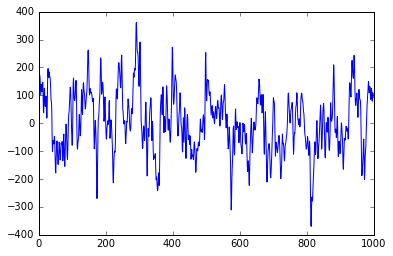

In [17]:
test1 = raw1[::12];
plt.plot(test1[30000:31000])


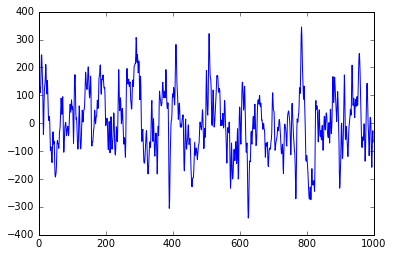

In [22]:
test2 = raw2[::16];
plt.plot(test2[30000:31000])

In [12]:
LFP['data']

array([  1.95000000e+00,   1.95000000e-01,  -1.36500000e+00, ...,
        -5.05245000e+02,  -5.04465000e+02,  -5.03685000e+02])